In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.virtual_documents']


In [3]:
dataset = pd.read_csv("/kaggle/input/heart-data-6/heart data-6.csv")

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [6]:
X_train.shape

(242, 7)

In [7]:
X_test.shape

(61, 7)

In [8]:
Y_train.shape

(242,)

In [9]:
Y_test.shape

(61,)

# **Model**

In [10]:
from sklearn.metrics import accuracy_score

**Logistic Regression**

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [12]:
Y_pred_lr.shape

(61,)

In [13]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 75.41 %


**Naive Bayes**

In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [15]:
Y_pred_nb.shape

(61,)

In [16]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 72.13 %


**SVM**

In [17]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [18]:
Y_pred_svm.shape

(61,)

In [19]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 80.33 %


**K Nearest Neighbors**

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [21]:
Y_pred_knn.shape

(61,)

In [22]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 60.66 %


**Decision Tree**

In [23]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [24]:
print(Y_pred_dt.shape)

(61,)


In [25]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.05 %


**Random Forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [43]:
Y_pred_rf.shape

(61,)

In [46]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 85.25 %


**XGBoost**

In [29]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [30]:
Y_pred_xgb.shape

(61,)

In [31]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 75.41 %


**Neural Network**

In [32]:
from keras.models import Sequential
from keras.layers import Dense

2024-03-28 10:28:37.706533: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 10:28:37.706780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 10:28:37.852088: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [33]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=7))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5229 - loss: 23.3537  
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5361 - loss: 20.4780 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5148 - loss: 18.4395 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5211 - loss: 15.7711 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5274 - loss: 12.9512 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5528 - loss: 9.8367  
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5296 - loss: 7.9086 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5001 - loss: 5.7846 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5473 - loss: 3.1691 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5490 - loss: 1.5057 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4917 - loss: 1.1223 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.469

In [35]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [36]:
Y_pred_nn.shape

(61, 1)

In [37]:
# Làm tròn từng phần tử của mảng Y_pred_nn sang số nguyên
rounded = np.round(Y_pred_nn).astype(int)

# Cập nhật mảng Y_pred_nn với giá trị đã được làm tròn
Y_pred_nn = rounded

In [38]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 72.13 %


**Output final score**

In [39]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 75.41 %
The accuracy score achieved using Naive Bayes is: 72.13 %
The accuracy score achieved using Support Vector Machine is: 80.33 %
The accuracy score achieved using K-Nearest Neighbors is: 60.66 %
The accuracy score achieved using Decision Tree is: 77.05 %
The accuracy score achieved using Random Forest is: 85.25 %
The accuracy score achieved using XGBoost is: 75.41 %
The accuracy score achieved using Neural Network is: 72.13 %


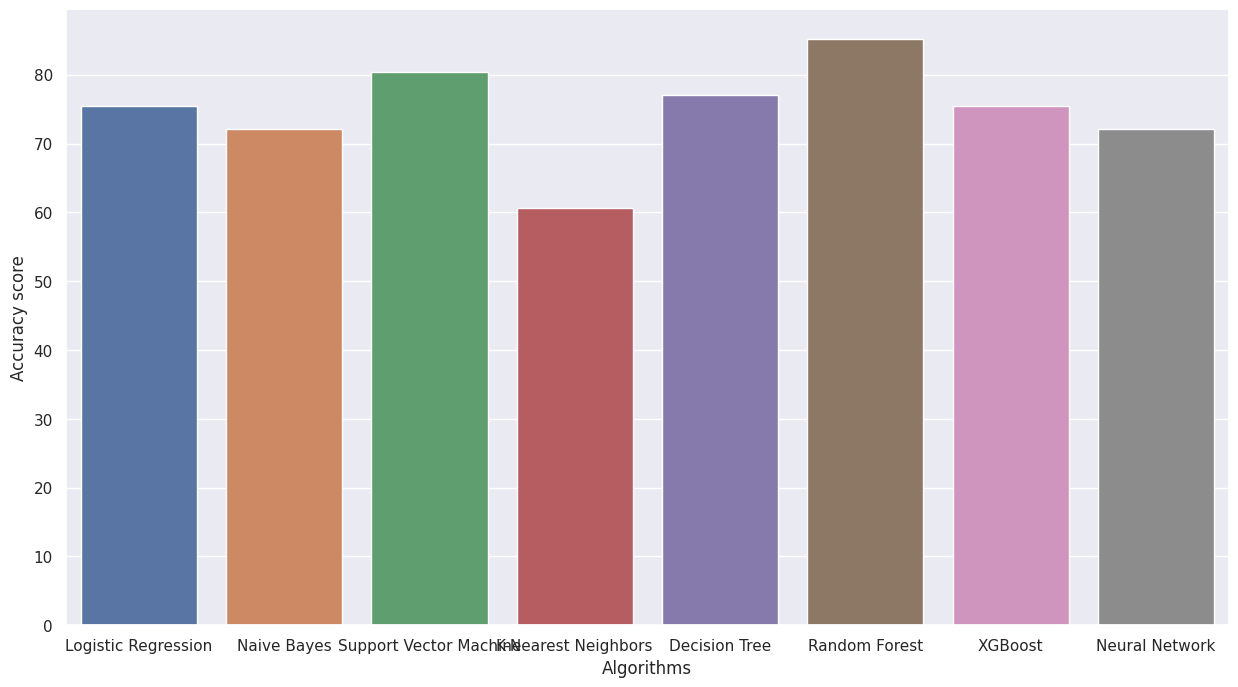

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your data
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]

# Create a DataFrame
data = {'Algorithms': algorithms, 'Accuracy Score': scores}
df = pd.DataFrame(data)

# Set the figure size
sns.set(rc={'figure.figsize':(15, 8)})

# Create the bar plot
sns.barplot(x='Algorithms', y='Accuracy Score', data=df)

# Set labels
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Show the plot
plt.show()